In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8')

Loading the dataset

In [24]:
df= pd.read_excel('/content/drive/MyDrive/data/f46a7ece-a8d2-4c71-a5ef-1cc9c3df8e3e.xlsx')

Basic Shape and info

In [25]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   product      27900 non-null  object 
 1   source       34660 non-null  object 
 2   categories   34660 non-null  object 
 3   date         34621 non-null  object 
 4   didPurchase  1 non-null      float64
 5   doRecommend  34066 non-null  float64
 6   rating       34627 non-null  float64
 7   reviews      34658 non-null  object 
 8   title        34654 non-null  object 
dtypes: float64(3), object(6)
memory usage: 2.4+ MB


Column wise missing values

In [26]:
(df.isnull().sum() / len(df)) * 100


,0
product,19.503751
source,0.000000
categories,0.000000
date,0.112522
didPurchase,99.997115
doRecommend,1.713791
rating,0.095211
reviews,0.005770
title,0.017311


Clean dataset for analysis

In [27]:
df = df.dropna(subset=['reviews', 'rating'])


In [28]:
df.shape

(34625, 9)

Rating distribution

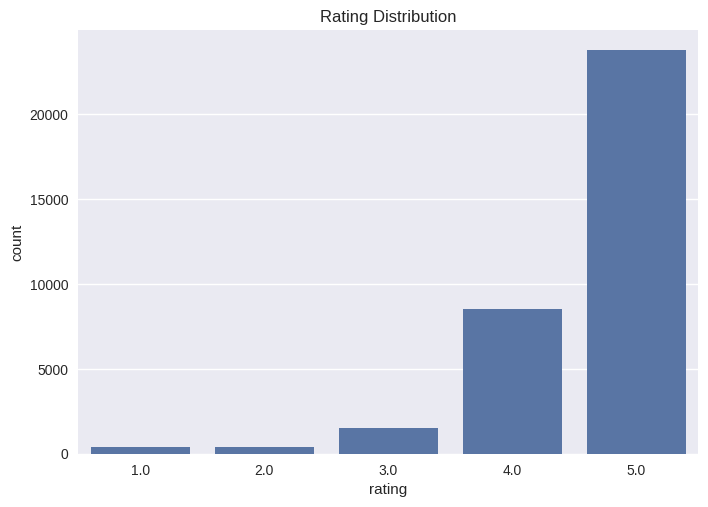

In [29]:
sns.countplot(x='rating', data=df)
plt.title('Rating Distribution')
plt.show()


Sentiment Label creation

In [30]:
df['sentiment'] = df['rating'].apply(
    lambda x: 1 if x >= 4 else 0
)


In [31]:
df['sentiment'].value_counts(normalize=True)


,proportion
sentiment,
1,0.933256
0,0.066744


Category Analysis

In [32]:
df['categories'].value_counts().head(10)


,count
categories,
"XYZ brand Tablets,Tablets,Computers & Tablets,All Tablets,Electronics, Tech Toys, Movies, Music,Electronics,iPad & Tablets,Android Tablets,Frys",10965
"Back To College,College Electronics,College Tvs & Home Theater,Electronics,Tvs & Home Theater,Streaming Devices,Featured Brands,Target Devices,Holiday Shop,Ways To Shop,TV & Home Theater,Streaming Media Players,All Streaming Media Players,TVs Entertainment,Video Games,brand name Store,Electronics Features,Kids & Family,XYZ brand TV",5056
"Stereos,Remote Controls,Target Echo,Audio Docks & Mini Speakers,Target Echo Accessories,Kitchen & Dining Features,Speaker Systems,Electronics,TVs Entertainment,Clearance,Smart Hubs & Wireless Routers,Featured Brands,Wireless Speakers,Smart Home & Connected Living,Home Security,brand name Store,Home Automation,Home, Garage & Office,Home,Voice-Enabled Smart Assistants,Virtual Assistant Speakers,Portable Audio & Headphones,Electronics Features,Target Device Accessories,iPod, Audio Player Accessories,Home & Furniture Clearance,Consumer Electronics,Smart Home,Surveillance,Home Improvement,Smart Home & Home Automation Devices,Smart Hubs,Home Safety & Security,Voice Assistants,Alarms & Sensors,Target Devices,Audio,Holiday Shop",3602
"Walmart for Business,Office Electronics,Tablets,Office,Electronics,iPad & Tablets,Windows Tablets,All Windows Tablets,Computers & Tablets,E-Readers & Accessories,E-Readers,eBook Readers,brand name E-readers,Computers/Tablets & Networking,Tablets & eBook Readers,Electronics Features,Books & Magazines,Book Accessories,eReaders,TVs & Electronics,Computers & Laptops,Tablets & eReaders",3176
"Stereos,Remote Controls,retail brand Echo,Audio Docks & Mini Speakers,retail brand Echo Accessories,Kitchen & Dining Features,Speaker Systems,Electronics,TVs Entertainment,Clearance,Smart Hubs & Wireless Routers,Featured Brands,Wireless Speakers,Smart Home & Connected Living,Home Security,brand name Store,Home Automation,Home, Garage & Office,Home,Voice-Enabled Smart Assistants,Virtual Assistant Speakers,Portable Audio & Headphones,Electronics Features,Target Device Accessories,iPod, Audio Player Accessories,Home & Furniture Clearance,Consumer Electronics,Smart Home,Surveillance,Home Improvement,Smart Home & Home Automation Devices,Smart Hubs,Home Safety & Security,Voice Assistants,Alarms & Sensors,Target Devices,Audio,Holiday Shop",3017
"Electronics,iPad & Tablets,All Tablets,XYZ brand Tablets,Tablets,Computers & Tablets",2814
"Tablets,XYZ brand Tablets,Computers & Tablets,All Tablets",1699
"Computers/Tablets & Networking,Tablets & eBook Readers,Computers & Tablets,Tablets,All Tablets",1038
"Featured Brands,Electronics,Target Devices,Home,Home Improvement,Home Safety & Security,Home Security,Alarms & Sensors,Smart Home & Home Automation Devices,Mobile,Mobile Speakers,Mobile Bluetooth Speakers,Smart Hubs & Wireless Routers,Smart Hubs,Home, Garage & Office,Smart Home,Voice Assistants,Smart Home & Connected Living,Target Tap,Portable Audio,MP3 Accessories,Speakers,Target Echo,Electronics Features,TVs & Electronics,Portable Audio & Electronics,MP3 Player Accessories,Home Theater & Audio,brand name Store,Frys,Electronic Components,Home Automation,Electronics, Tech Toys, Movies, Music,Audio,Bluetooth Speakers",636


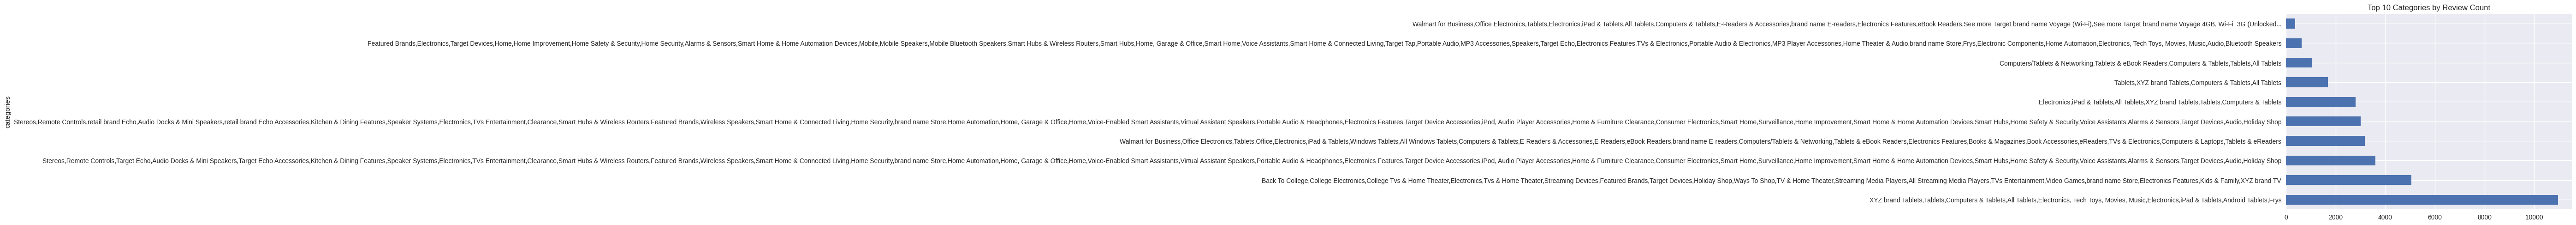

In [33]:
df['categories'].value_counts().head(10).plot(kind='barh')
plt.title('Top 10 Categories by Review Count')
plt.show()


Product review count distribution

In [34]:
df['product'].value_counts().describe()


,count
count,60.000000
mean,464.433333
std,1551.761529
min,1.000000
25%,1.000000
50%,5.000000
75%,129.500000
max,10961.000000


Review length analysis

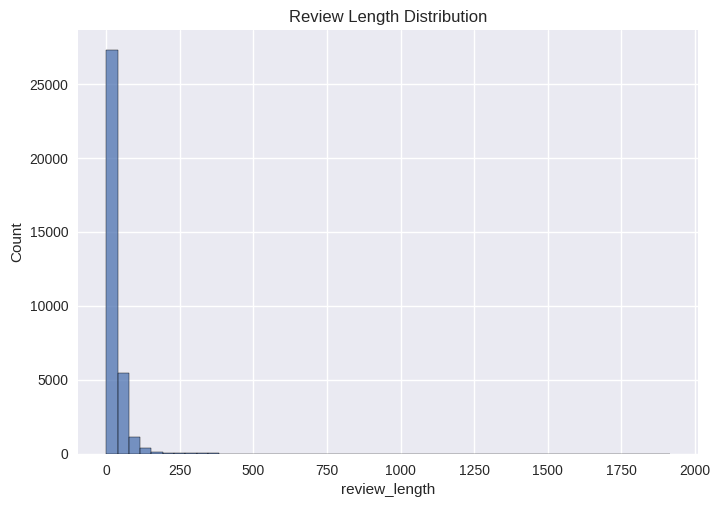

In [35]:
df['review_length'] = df['reviews'].apply(lambda x: len(x.split()))

sns.histplot(df['review_length'], bins=50)
plt.title('Review Length Distribution')
plt.show()


Relationship between rating and review length

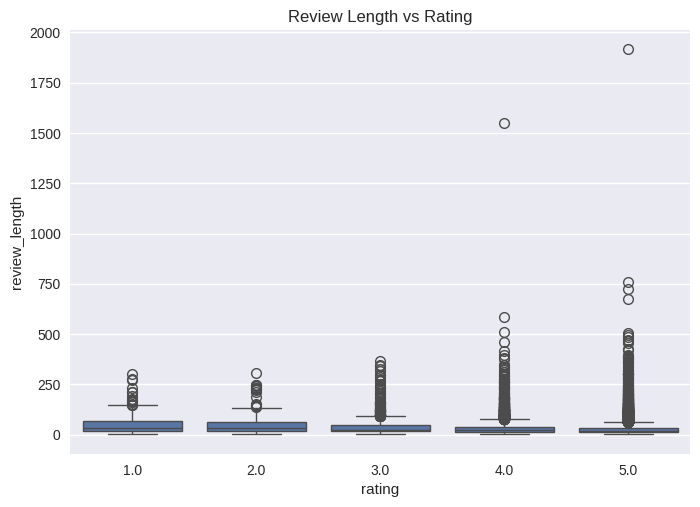

In [36]:
sns.boxplot(x='rating', y='review_length', data=df)
plt.title('Review Length vs Rating')
plt.show()


Saving clean data for next notebook

In [38]:
df.to_csv('/content/drive/MyDrive/data/clean_reviews.csv', index=False)